> Created on Fri Nov 25 19:41:37 2022  @author: Richie Bao-caDesign设计(cadesign.cn)

## 2.7.4 空间动力学



### 2.7.3.4 

In [46]:
from database import postSQL2gpd,gpd2postSQL
from util_misc import AttrDict
__C=AttrDict() 
args=__C

__C.db=AttrDict() 
__C.db.UN='postgres'
__C.db.PW='123456'
__C.db.DB='AoT_20220831'
__C.db.GC='geometry' 
__C.db.db_info=dict(geom_col=args.db.GC,myusername=args.db.UN,mypassword=args.db.PW,mydatabase=args.db.DB)

__C.gi=AttrDict()
__C.gi.Chicago_epsg=32616
__C.gi.epsg_wgs84=4326

__C.data=AttrDict()
__C.data.sn_bound_10deg='./data/MCD12Q1v006/sn_bound_10deg.txt'
__C.data.MCD12Q1v006='G:\data\MCD12Q1v006\data'

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


def modland_grids(fp,start_idx=0,boundary_coordi=None): #[lon_min,lon_max,lat_min,lat_max]
    import pandas as pd
    
    with open (fp,'r') as f:
        lines=f.readlines()[start_idx:-2]
    lines_df=pd.DataFrame(columns=lines[0].split(),data=[row.split() for row in lines[1:]])
    lines_df=lines_df.apply(pd.to_numeric,errors='ignore')
    
    def within_func(row):
        lon_sum=(row.lon_min>=lon_min and row.lon_min<=lon_max)+(row.lon_max>=lon_min and row.lon_max<=lon_max)    
        lat_sum=(row.lat_min>=lat_min and row.lat_min<=lat_max)+(row.lat_max>=lat_min and row.lat_max<=lat_max)
        if lon_sum>0 and lat_sum>0:
            return 1
        else: 
            return 0        
        
    if boundary_coordi:
        lon_min,lon_max,lat_min,lat_max=boundary_coordi
        lines_df['mask']=lines_df.apply(within_func,axis=1) 
        extracted_rows=lines_df[lines_df['mask']==1]
        extracted_rows['identifier']=extracted_rows.apply(lambda row:f"h{int(row.ih)}v{int(row.iv):02}",axis=1)
        return extracted_rows
    else:
        return lines_df    
    
modland_ivih_masked=modland_grids(args.data.sn_bound_10deg,start_idx=6,boundary_coordi=[68,139,15,57])    
print(modland_ivih_masked.shape)
modland_ivih_masked.sort_values(by=['ih','iv'])

(38, 8)


,iv,ih,lon_min,lon_max,lat_min,lat_max,mask,identifier
129,3,21,46.6717,80.0167,50.0,60.0,1,h21v03
130,3,22,62.2290,100.0167,50.0,60.0,1,h22v03
166,4,22,52.2163,77.7992,40.0,50.0,1,h22v04
131,3,23,77.7862,120.0167,50.0,60.0,1,h23v03
167,4,23,65.2704,93.3564,40.0,50.0,1,h23v04
203,5,23,57.7350,78.3353,30.0,40.0,1,h23v05
239,6,23,53.2089,69.2917,20.0,30.0,1,h23v06
132,3,24,93.3434,140.0167,50.0,60.0,1,h24v03
168,4,24,78.3244,108.9136,40.0,50.0,1,h24v04
204,5,24,69.2820,91.3894,30.0,40.0,1,h24v05


In [35]:
import logging
from urllib.parse import urljoin
import requests
from bs4 import BeautifulSoup

logging.basicConfig(
    format='%(asctime)s %(levelname)s:%(message)s',
    level=logging.INFO)

class Crawler:

    def __init__(self, urls=[],iter=True):
        self.visited_urls = []
        self.urls_to_visit = urls
        self.iter=iter
        self.visited_urls_dict={}

    def download_url(self, url):
        return requests.get(url).text

    def get_linked_urls(self, url, html):
        soup = BeautifulSoup(html, 'html.parser')
        # print("-"*50)
        for link in soup.find_all('a'):
            path = link.get('href')
            # print(path)
            if path and path.startswith('/'):
                path = urljoin(url, path)
            yield path

    def add_url_to_visit(self, url):
        if url not in self.visited_urls and url not in self.urls_to_visit:
            self.urls_to_visit.append(url)

    def crawl(self, url_):
        self.visited_urls_dict[url_]=[]
        html = self.download_url(url_)
        # print(html)
        for url in self.get_linked_urls(url_, html):
            # print(url)
            if self.iter:
                self.add_url_to_visit(url)
            else:
                self.visited_urls_dict[url_].append(url)

    def run(self):
        while self.urls_to_visit:
            url = self.urls_to_visit.pop(0)
            logging.info(f'Crawling: {url}')
            
            try:
                self.crawl(url)
            except Exception:
                logging.exception(f'Failed to crawl: {url}')
            finally:
                self.visited_urls.append(url)      
                
if __name__=="__main__":
    url_root_lst=[f'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/{i}.01.01/' for i in range(2001,2021,1)]       
    wc=Crawler(urls=url_root_lst,iter=False)
    wc.run() 

2022-11-26 22:40:04,330 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2001.01.01/
2022-11-26 22:40:11,637 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2002.01.01/
2022-11-26 22:40:18,770 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2003.01.01/
2022-11-26 22:40:33,717 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2004.01.01/
2022-11-26 22:40:41,698 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2005.01.01/
2022-11-26 22:40:50,801 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2006.01.01/
2022-11-26 22:41:03,008 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2007.01.01/
2022-11-26 22:41:23,663 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2008.01.01/
2022-11-26 22:41:43,912 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2009.01.01/
2022-11-26 22:42:00,803 INFO:Crawling: https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2010.01.01/
2022-11-26 22:42:17,206 INFO:Crawling: h

In [37]:
import pickle

MCD12Q1_crawl_url_fp="./data/MCD12Q1_crawl_urls.pickle"
with open(MCD12Q1_crawl_url_fp,'wb') as f:
    pickle.dump(wc.visited_urls_dict,f)

In [3]:
identifier=modland_ivih_masked.identifier.to_list()
print(identifier)

['h21v03', 'h22v03', 'h23v03', 'h24v03', 'h25v03', 'h26v03', 'h22v04', 'h23v04', 'h24v04', 'h25v04', 'h26v04', 'h27v04', 'h28v04', 'h23v05', 'h24v05', 'h25v05', 'h26v05', 'h27v05', 'h28v05', 'h29v05', 'h30v05', 'h23v06', 'h24v06', 'h25v06', 'h26v06', 'h27v06', 'h28v06', 'h29v06', 'h30v06', 'h31v06', 'h24v07', 'h25v07', 'h26v07', 'h27v07', 'h28v07', 'h29v07', 'h30v07', 'h31v07']


In [3]:
import pickle

MCD12Q1_crawl_url_fp="./data/MCD12Q1_crawl_urls.pickle"
with open(MCD12Q1_crawl_url_fp,'rb') as f:
    MCD12Q1_crawl_urls=pickle.load(f)

In [4]:
MCD12Q1_crawl_urls.keys()

dict_keys(['https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2001.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2002.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2003.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2004.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2005.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2006.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2007.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2008.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2009.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2010.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2011.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2012.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2013.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2014.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2015.01.01/', 'https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/2016.01.01/', 'https://e4ftl01.cr.usgs.gov/

In [29]:
def urls_extraction(urls_dict,conditional_chars):
    from urllib.parse import urljoin
    
    urls_extraction_dict={}
    urls_extraction_lst=[]
    for k,v in urls_dict.items():
        urls_extraction_dict[k]=[]
        for url in v:
            for i in identifier:
                if i in url:
                    urls_extraction_dict[k].append(urljoin(k,url))
                    urls_extraction_lst.append(urljoin(k,url))
    return urls_extraction_dict,urls_extraction_lst    
    
urls_extraction_dict,urls_extraction_lst=urls_extraction(MCD12Q1_crawl_urls,identifier)    
#urls_extraction_dict
import numpy as np
np.savetxt('./data/urls_extraction_lst.txt', urls_extraction_lst, delimiter="\n", fmt="%s")

In [30]:
print(len(urls_extraction_lst))

2052


In [6]:
def urls_download(urls_dict,pattern,save_root):
    import re
    import os
    import urllib
    import shutil
    import wget
    import requests
    from requests.auth import HTTPBasicAuth
    import urllib3   
    import bs4
    #from urllib import request, parse
 
    for k,v in urls_dict.items():
        #print(k)
        directory_name=re.findall(pattern,k)
        #print(directory_name[0])
        save_dir=os.path.join(save_root,directory_name[0])
        isExist=os.path.exists(save_dir)
        if not isExist:
            os.makedirs(save_dir)                
        else:
            print(f"The directory {save_dir} already exists.") #  No files will be downloaded.
            
        for url in v:
            fn=os.path.basename(url)
            save_fn=os.path.join(save_dir,fn)
            print(save_fn)
            print(url)
                        
            request_pwd = urllib.request.HTTPPasswordMgrWithDefaultRealm()
            request_pwd.add_password(None, url, 'richiebao_siniticink', 'Lfyh0322')
            handler = urllib.request.HTTPBasicAuthHandler(request_pwd)            
            handler_open = urllib.request.build_opener(handler)
            urllib.request.install_opener(handler_open)
            
            req_obj = urllib.request.Request(url)
            with urllib.request.urlopen(req_obj) as res_obj:
                print(res_obj.read())
            

            #print(type(handler_open))
           # res_obj = handler_open.open(url)
            #auth=HTTPBasicAuth('richiebao_siniticink', 'Lfyh0322')            
            #headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}
            #request=requests.get(url,verify=False) # auth=auth,verify=True, headers=headers
            
            #a=urllib.request.urlopen(url)
            
            #print(request.text)
            #response=wget.download(url,save_fn,)
            
            
            
            #print(request.content)
            #with open(save_fn, 'wb') as f:
                #f.write(request.content)
            #open(save_fn,'wb').write(request.content)
            
            #with urllib.request.urlopen(url) as response,open(save_fn,'wb') as out_file: # auth=("richiebao_siniticink","Lfyh0322")
                #shutil.copyfileobj(response,out_file)
            break
        
        break    
    
pattern=r'006.(\d+)\.'
save_root='G:\data\MCD12Q1v006\data' 
#urls_download(urls_extraction_dict,pattern,save_root)    

In [43]:
cc="MCD12Q1.A2020001.h00v09.006.2021361185533.hdf"
"h00v09" in cc

True

In [97]:
import wget

help(wget.download)

Help on function download in module wget:

download(url, out=None, bar=<function bar_adaptive at 0x00000221C8B64F70>)
    High level function, which downloads URL into tmp file in current
    directory and then renames it to filename autodetected from either URL
    or HTTP headers.
    
    :param bar: function to track download progress (visualize etc.)
    :param out: output filename or directory
    :return:    filename where URL is downloaded to



In [6]:
import glob
import os
MCD12Q1v006_2020_fps=glob.glob(os.path.join(args.data.MCD12Q1v006+"/2020","*.hdf"))
MCD12Q1v006_2020_fps

['G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h21v03.006.2021360001124.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h22v03.006.2021360011919.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h22v04.006.2021360002151.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h23v03.006.2021360020157.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h23v04.006.2021360003352.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h23v05.006.2021360044632.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h23v06.006.2021359220324.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h24v03.006.2021360044633.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h24v04.006.2021360052455.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h24v05.006.2021360060254.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h24v06.006.2021360003352.hdf',
 'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h24v07.006.202135916550

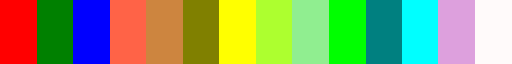

In [36]:
from matplotlib.colors import from_levels_and_colors
from matplotlib import colors

labels={1:"Barren",
        2:"Permanent_Snow_and_Ice",
        3:"Water_Bodies",
        11:"Evergreen_Needleleaf_Forests",
        13:"Deciduous_Needleleaf_Forests",
        14:"Deciduous_Broadleaf_Forests",
        15:"Mixed_Broadleaf_Needleleaf_Forests",
        16:"Mixed_Broadleaf_Forests",
        21:"Open_Forests",
        22:"Sparse_Forests",
        31:"Dense_Herbaceous",
        32:"Sparse_Herbaceous",
        42:"Shrubland_Grassland_Mosaics",
        43:"Sparse_Shrublands",
        255:"Unclassified"}

cmap_lst=[[1,2,3,11,13,14,15,16,21,22,31,32,42,43,255],['red','green','blue','tomato','peru','olive','yellow','greenyellow','lightgreen','lime','teal','cyan','plum','snow']]
cmap_dict={k[0]:colors.to_rgb(k[1]) for k in zip(*cmap_lst)}
cmap, norm=from_levels_and_colors(cmap_lst[0],cmap_lst[1])
cmap

In [37]:
import matplotlib.patches as mpatches
patches=[mpatches.Patch(color=cmap_dict[i],label=labels[i]) for i in cmap_dict]

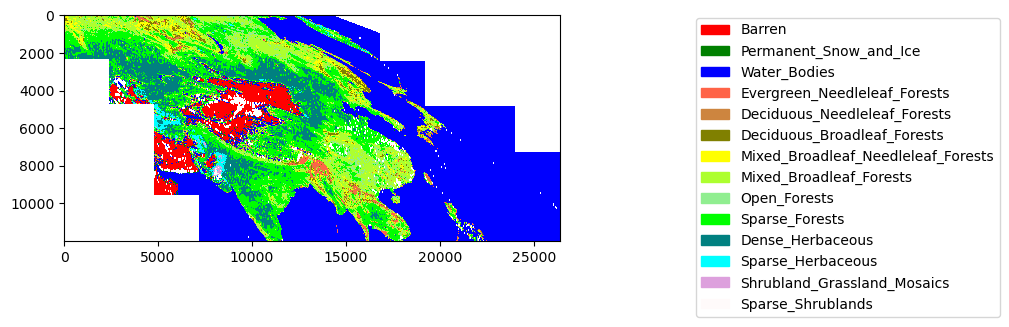

In [38]:
from rioxarray.merge import merge_arrays
import rioxarray as rxr
import matplotlib.pyplot as plt

arrays=[rxr.open_rasterio(i,masked=True)['LC_Prop1']for i in MCD12Q1v006_2020_fps]
merged=merge_arrays(arrays)

plt.imshow(merged[0], cmap=cmap, norm=norm)
plt.legend(handles=patches, bbox_to_anchor=(1.9, 1.02),ncol=1, fancybox=True,);

In [39]:
print(len(arrays))
merged

39


<xarray.DataArray 'LC_Prop1' (band: 1, y: 12000, x: 26400)>
array([[[15., 15., 15., ..., nan, nan, nan],
        [15., 15., 15., ..., nan, nan, nan],
        [15., 15., 15., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  3.,  3.,  3.],
        [nan, nan, nan, ...,  3.,  3.,  3.],
        [nan, nan, nan, ...,  3.,  3.,  3.]]], dtype=float32)
Coordinates:
  * x            (x) float64 3.336e+06 3.337e+06 ... 1.557e+07 1.557e+07
  * y            (y) float64 6.671e+06 6.671e+06 ... 1.113e+06 1.112e+06
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes: (12/22)
    Barren:                              1
    Deciduous Broadleaf Forests:         14
    Deciduous Needleleaf Forests:        13
    Dense Herbaceous:                    31
    Dense Shrublands:                    41
    Evergreen Broadleaf Forests:         12
    ...                                  ...
    Unclassified:                        255
    valid_range:                         1, 43
    Water Bodies:                        3
    scale_factor:                        1.0
    add_offset:                          0.0
    _FillValue:                          nan

In [40]:
merged.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

epsg:4326


<AxesSubplot:>

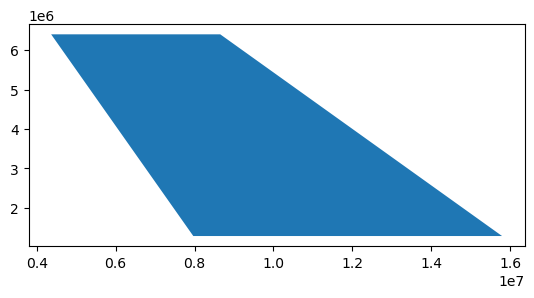

In [66]:
import geopandas as gpd
from shapely.geometry import box

geodf=gpd.GeoDataFrame(
    geometry=[
        box(73.14, 11.56, 145.00, 57.55)
    ],
    crs=args.gi.epsg_wgs84
)
print(geodf.crs)
geodf.to_crs(merged.rio.crs,inplace=True)
geodf.plot()

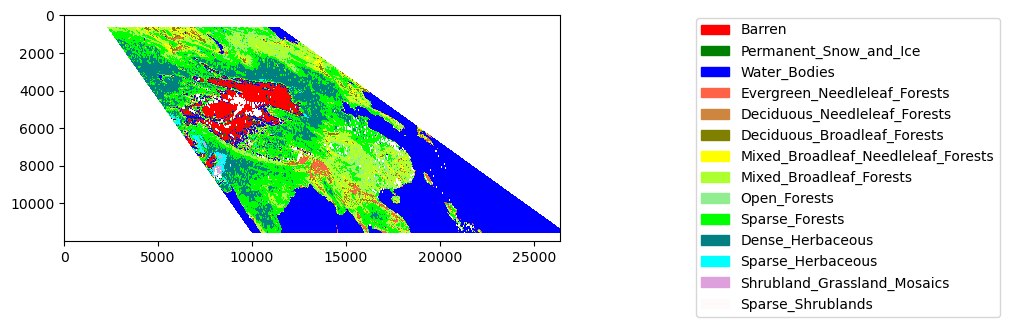

In [67]:
clipped=merged.rio.clip(geodf.geometry.values, geodf.crs, drop=False)
plt.imshow(clipped[0], cmap=cmap, norm=norm)
plt.legend(handles=patches, bbox_to_anchor=(1.9, 1.02),ncol=1, fancybox=True,);

In [69]:
raster_fp="G:/temp/0009.tif"
clipped.rio.to_raster(raster_fp)
print("-"*50)

--------------------------------------------------


In [43]:
xx=merged.rio.write_crs(geomorphology_ds.crs, inplace=False)
print(xx.rio.crs)
raster_fp="G:/temp/0004.tif"
xx.rio.to_raster(raster_fp)
print("-"*50)

PROJCS["Krasovsky_1940_Albers",GEOGCS["UnknowndatumbasedupontheKrassowsky1940ellipsoid",DATUM["Not_specified_based_on_Krassowsky_1940_ellipsoid",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6024"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
--------------------------------------------------


In [47]:
from shapely.geometry import box
help(box)

Help on function box in module shapely.geometry.geo:

box(minx, miny, maxx, maxy, ccw=True)
    Returns a rectangular polygon with configurable normal vector



In [30]:
import warnings
warnings.simplefilter('ignore')

import earthpy as et
import rioxarray as rxr

m_2020_h24v04_fp=MCD12Q1v006_2020_fps[0]
m_2020_h24v04=rxr.open_rasterio(m_2020_h24v04_fp,masked=True)
print(type(m_2020_h24v04))
m_2020_h24v04

<class 'xarray.core.dataset.Dataset'>


<xarray.Dataset>
Dimensions:              (band: 1, x: 2400, y: 2400)
Coordinates:
  * band                 (band) int32 1
  * x                    (x) float64 3.336e+06 3.337e+06 ... 4.447e+06 4.448e+06
  * y                    (y) float64 6.671e+06 6.671e+06 ... 5.56e+06 5.56e+06
    spatial_ref          int32 0
Data variables: (12/13)
    LC_Type1             (band, y, x) float32 ...
    LC_Prop2             (band, y, x) float32 ...
    LC_Prop3             (band, y, x) float32 ...
    QC                   (band, y, x) float32 ...
    LW                   (band, y, x) float32 ...
    LC_Type2             (band, y, x) float32 ...
    ...                   ...
    LC_Type4             (band, y, x) float32 ...
    LC_Type5             (band, y, x) float32 ...
    LC_Prop1_Assessment  (band, y, x) float32 ...
    LC_Prop2_Assessment  (band, y, x) float32 ...
    LC_Prop3_Assessment  (band, y, x) float32 ...
    LC_Prop1             (band, y, x) float32 ...
Attributes: (12/64)
    ALGORITHMPACKAGEACCEPTANCEDATE:     1998-01-01
    ALGORITHMPACKAGEMATURITYCODE:       LAUNCH
    ALGORITHMPACKAGENAME:               MOD12Q1
    ALGORITHMPACKAGEVERSION:            V2.0
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDINSTRUMENTSHORTNAME.2:    MODIS
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            50.0
    SPSOPARAMETERS:                     2669
    TileID:                             51021003
    VERSIONID:                          6
    VERTICALTILENUMBER:                 3
    WESTBOUNDINGCOORDINATE:             46.671715

In [37]:
m_2020_h24v04.attrs

{'ALGORITHMPACKAGEACCEPTANCEDATE': '1998-01-01',
 'ALGORITHMPACKAGEMATURITYCODE': 'LAUNCH',
 'ALGORITHMPACKAGENAME': 'MOD12Q1',
 'ALGORITHMPACKAGEVERSION': 'V2.0',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDINSTRUMENTSHORTNAME.2': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra',
 'ASSOCIATEDPLATFORMSHORTNAME.2': 'Aqua',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'ASSOCIATEDSENSORSHORTNAME.2': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': "To be set as 'Passed' or 'Failed' to indicate failure of PGE test.",
 'CHARACTERISTICBINANGULARSIZE': 15.0,
 'CHARACTERISTICBINSIZE': 463.3127165,
 'DATACOLUMNS': 2400,
 'DATAROWS': 2400,
 'DAYNIGHTFLAG': 'Day',
 'DESCRREVISION': 5.1,
 'EASTBOUNDINGCOORDINATE': 80.016667,
 'EXCLUSIONGRINGFLAG.1': 'N',
 'GEOANYABNORMAL': 'False',
 'GEOESTMAXRMSERROR': 50.0,
 'GLOBALGRIDCOLUMNS': 86400,
 'GLOBALGRIDROWS': 43200,
 'GRINGPOINTLATITUDE.1': '49.755422, 60.073094, 59.974566, 49.70696',
 'GRINGPOINTLONGITU

In [38]:
m_2020_h24v04.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int32 0
Attributes: (12/16)
    crs_wkt:                         PROJCS["unnamed",GEOGCS["Unknown datum b...
    semi_major_axis:                 6371007.181
    semi_minor_axis:                 6371007.181
    inverse_flattening:              0.0
    reference_ellipsoid_name:        Custom spheroid
    longitude_of_prime_meridian:     0.0
    ...                              ...
    grid_mapping_name:               sinusoidal
    longitude_of_projection_origin:  0.0
    false_easting:                   0.0
    false_northing:                  0.0
    spatial_ref:                     PROJCS["unnamed",GEOGCS["Unknown datum b...
    GeoTransform:                    3335851.559 463.3127165279167 0.0 667170...

In [39]:
m_2020_h24v04["LC_Prop1"]

<xarray.DataArray 'LC_Prop1' (band: 1, y: 2400, x: 2400)>
[5760000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 3.336e+06 3.337e+06 ... 4.447e+06 4.448e+06
  * y            (y) float64 6.671e+06 6.671e+06 6.671e+06 ... 5.56e+06 5.56e+06
    spatial_ref  int32 0
Attributes: (12/21)
    Barren:                              1
    Deciduous Broadleaf Forests:         14
    Deciduous Needleleaf Forests:        13
    Dense Herbaceous:                    31
    Dense Shrublands:                    41
    Evergreen Broadleaf Forests:         12
    ...                                  ...
    Sparse Shrublands:                   43
    Unclassified:                        255
    valid_range:                         1, 43
    Water Bodies:                        3
    scale_factor:                        1.0
    add_offset:                          0.0

In [40]:
m_2020_h24v04["LC_Prop1"].values

array([[[15., 15., 15., ..., 22., 22., 31.],
        [15., 15., 15., ..., 21., 22., 22.],
        [15., 15., 15., ..., 22., 22., 22.],
        ...,
        [31., 31., 31., ..., 31., 31., 31.],
        [31., 31., 31., ..., 31., 31., 31.],
        [31., 31., 31., ..., 31., 31., 31.]]], dtype=float32)

In [12]:
raster_fp="G:/temp/0000.tif"
m_2020_h24v04.LC_Prop1.rio.to_raster(raster_fp)

In [14]:
!rio info G:/temp/0000.tif

{"blockysize": 3, "bounds": [3335851.559, 5559752.598333, 4447802.078667, 6671703.118], "colorinterp": ["gray"], "count": 1, "crs": "PROJCS[\"unnamed\",GEOGCS[\"Unknown datum based upon the custom spheroid\",DATUM[\"Not specified (based on custom spheroid)\",SPHEROID[\"Custom spheroid\",6371007.181,0]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]]],PROJECTION[\"Sinusoidal\"],PARAMETER[\"longitude_of_center\",0],PARAMETER[\"false_easting\",0],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH]]", "descriptions": ["Land_Cover_Property_1"], "driver": "GTiff", "dtype": "uint8", "height": 2400, "indexes": [1], "interleave": "band", "lnglat": [61.02063783374648, 54.99999999505933], "mask_flags": [["nodata"]], "nodata": 255.0, "res": [463.3127165279165, 463.3127165279165], "shape": [2400, 2400], "tiled": false, "transform": [463.3127165279165, 0.0, 3335851.559, 0.0, -463.31271

In [15]:
m_2020_h24v04.LC_Prop1.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int32 0
Attributes: (12/16)
    crs_wkt:                         PROJCS["unnamed",GEOGCS["Unknown datum b...
    semi_major_axis:                 6371007.181
    semi_minor_axis:                 6371007.181
    inverse_flattening:              0.0
    reference_ellipsoid_name:        Custom spheroid
    longitude_of_prime_meridian:     0.0
    ...                              ...
    grid_mapping_name:               sinusoidal
    longitude_of_projection_origin:  0.0
    false_easting:                   0.0
    false_northing:                  0.0
    spatial_ref:                     PROJCS["unnamed",GEOGCS["Unknown datum b...
    GeoTransform:                    3335851.559 463.3127165279167 0.0 667170...

In [31]:
m_2020_h24v04.LC_Prop1.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [24]:
def postSQL2raster(**kwargs):
    import psycopg2
    from osgeo import gdal
    from rasterio.io import MemoryFile
    import rasterio as rio
    try:
        conn=psycopg2.connect("dbname={DB} user={UN} host='localhost' password={PW}".format(DB=kwargs['DB'],UN=kwargs['UN'],PW=kwargs['PW']))
        conn.set_session(autocommit=True) #if you want your updates to take effect without being in a transaction and requiring a commit, for a beginner, I would set this to True
    except:
        print("I am unable to connect to the database...")    
    # query="""SELECT ST_AsGDALRaster(rast, 'GTiff', ARRAY['COMPRESS=LZW']) as tiff FROM {0}.{1} WHERE rid = 1""".format('public',kwargs['TN'])
    # query="""SELECT ST_AsGDALRaster(rast, 'GTiff', ARRAY['COMPRESS=LZW']) as tiff FROM {0}.{1}""".format('public',kwargs['TN']) # WHERE rid = 1   
    query="""SELECT ST_AsGDALRaster(ST_Union(rast), 'GTiff') as rasttif FROM {0}.{1}""".format('public',kwargs['TN']) # WHERE rid = 1  , ARRAY['COMPRESS=LZW']
        
    curs=conn.cursor()
    curs.execute(query)
    with MemoryFile(curs.fetchall()[0][0].tobytes()) as memfile:
        ds=memfile.open()    
    # print(ds.read())    
    # print(curs.fetchall())
    # with rio.open('./temp/output.tif', 'w', **ds.profile) as dst:
    #     dst.write(ds.read())   

    return ds,ds.read()

In [25]:
geomorphology_raster_fn=r'G:\data\bNg\raster\geomor\geomor1.tif' 
geomorphology_ds,geomorphology_array=postSQL2raster(DB="bNg",UN=args.db.UN,PW=args.db.PW,TN="geomorphology") 

In [26]:
print("custom CRS wkt:\n{}".format(geomorphology_ds.crs.wkt)) 

custom CRS wkt:
PROJCS["Krasovsky_1940_Albers",GEOGCS["UnknowndatumbasedupontheKrassowsky1940ellipsoid",DATUM["Not_specified_based_on_Krassowsky_1940_ellipsoid",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6024"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [32]:
xx=m_2020_h24v04.LC_Prop1.rio.write_crs(geomorphology_ds.crs, inplace=False)
xx.rio.crs

CRS.from_wkt('PROJCS["Krasovsky_1940_Albers",GEOGCS["UnknowndatumbasedupontheKrassowsky1940ellipsoid",DATUM["Not_specified_based_on_Krassowsky_1940_ellipsoid",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6024"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [33]:
raster_fp="G:/temp/0002.tif"
xx.rio.to_raster(raster_fp)

In [ ]:
xx=m_2020_h24v04.LC_Prop1.rio.write_crs(geomorphology_ds.crs, inplace=False)
xx.rio.crs
raster_fp="G:/temp/0002.tif"
xx.rio.to_raster(raster_fp)

In [8]:
import rasterio as rio

with rio.open(m_2020_h24v04_fp) as groups:
    for name in groups.subdatasets:        
        print(name)

HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Type1
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Prop2
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Prop3
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:QC
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LW
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Type2
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Type3
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Type4
HDF4_EOS:EOS_GRID:G:/data/MCD12Q1v006/data/2020/MCD12Q1.A2020001.h21v03.006.2021360001124.hdf:MCD12Q1:LC_Type5
HDF4_EOS:EOS_

In [42]:
rxr.open_rasterio(m_2020_h24v04_fp,
                  masked=True,
                  group="MCD12Q1").squeeze()

<xarray.Dataset>
Dimensions:              (x: 2400, y: 2400)
Coordinates:
    band                 int32 1
  * x                    (x) float64 3.336e+06 3.337e+06 ... 4.447e+06 4.448e+06
  * y                    (y) float64 6.671e+06 6.671e+06 ... 5.56e+06 5.56e+06
    spatial_ref          int32 0
Data variables: (12/13)
    LC_Type1             (y, x) float32 ...
    LC_Prop2             (y, x) float32 ...
    LC_Prop3             (y, x) float32 ...
    QC                   (y, x) float32 ...
    LW                   (y, x) float32 ...
    LC_Type2             (y, x) float32 ...
    ...                   ...
    LC_Type4             (y, x) float32 ...
    LC_Type5             (y, x) float32 ...
    LC_Prop1_Assessment  (y, x) float32 ...
    LC_Prop2_Assessment  (y, x) float32 ...
    LC_Prop3_Assessment  (y, x) float32 ...
    LC_Prop1             (y, x) float32 ...
Attributes: (12/64)
    ALGORITHMPACKAGEACCEPTANCEDATE:     1998-01-01
    ALGORITHMPACKAGEMATURITYCODE:       LAUNCH
    ALGORITHMPACKAGENAME:               MOD12Q1
    ALGORITHMPACKAGEVERSION:            V2.0
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDINSTRUMENTSHORTNAME.2:    MODIS
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            50.0
    SPSOPARAMETERS:                     2669
    TileID:                             51021003
    VERSIONID:                          6
    VERTICALTILENUMBER:                 3
    WESTBOUNDINGCOORDINATE:             46.671715

In [9]:
desired_bands=["LC_Prop1",
               "LC_Prop1_Assessment"]
m_2020_h24v04_prop1=rxr.open_rasterio(m_2020_h24v04_fp,variable=desired_bands).squeeze()
m_2020_h24v04_prop1

<xarray.Dataset>
Dimensions:              (x: 2400, y: 2400)
Coordinates:
    band                 int32 1
  * x                    (x) float64 3.336e+06 3.337e+06 ... 4.447e+06 4.448e+06
  * y                    (y) float64 6.671e+06 6.671e+06 ... 5.56e+06 5.56e+06
    spatial_ref          int32 0
Data variables:
    LC_Prop1_Assessment  (y, x) uint8 ...
    LC_Prop1             (y, x) uint8 ...
Attributes: (12/64)
    ALGORITHMPACKAGEACCEPTANCEDATE:     1998-01-01
    ALGORITHMPACKAGEMATURITYCODE:       LAUNCH
    ALGORITHMPACKAGENAME:               MOD12Q1
    ALGORITHMPACKAGEVERSION:            V2.0
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDINSTRUMENTSHORTNAME.2:    MODIS
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            50.0
    SPSOPARAMETERS:                     2669
    TileID:                             51021003
    VERSIONID:                          6
    VERTICALTILENUMBER:                 3
    WESTBOUNDINGCOORDINATE:             46.671715

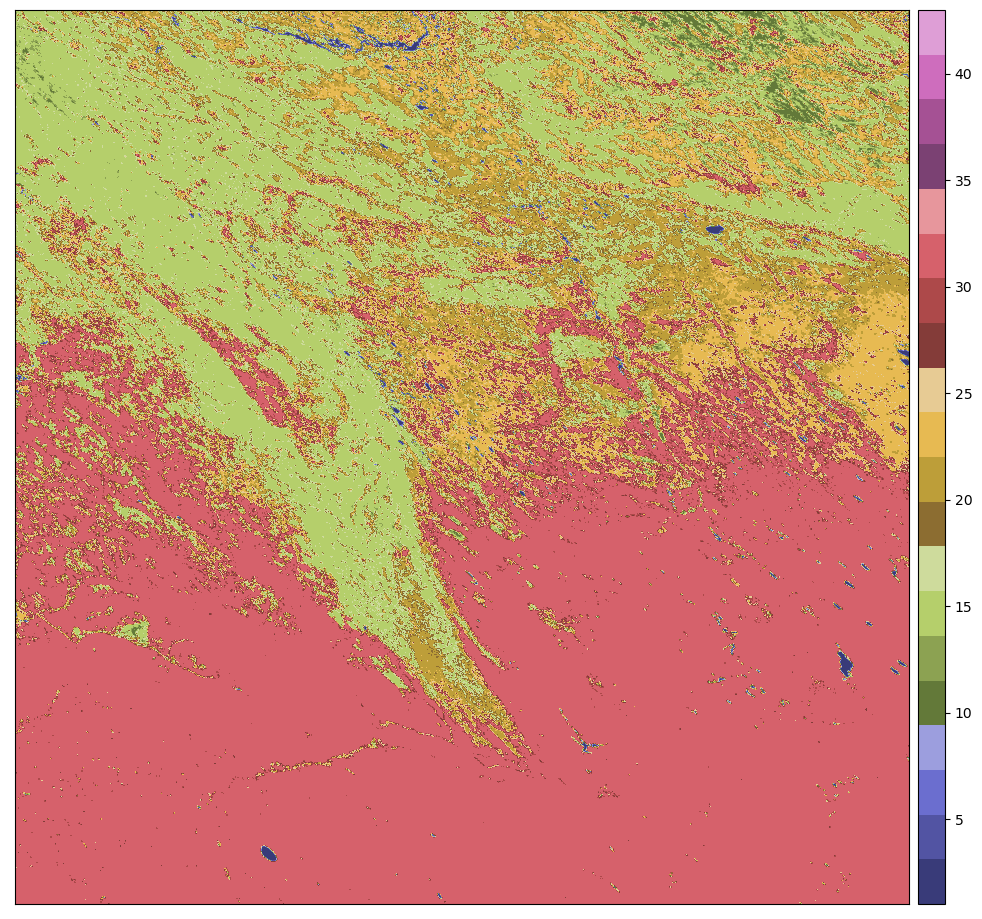

In [44]:
import earthpy.plot as ep
import matplotlib.pyplot as plt

ep.plot_bands(m_2020_h24v04_prop1.LC_Prop1,cmap='tab20b')
plt.show()

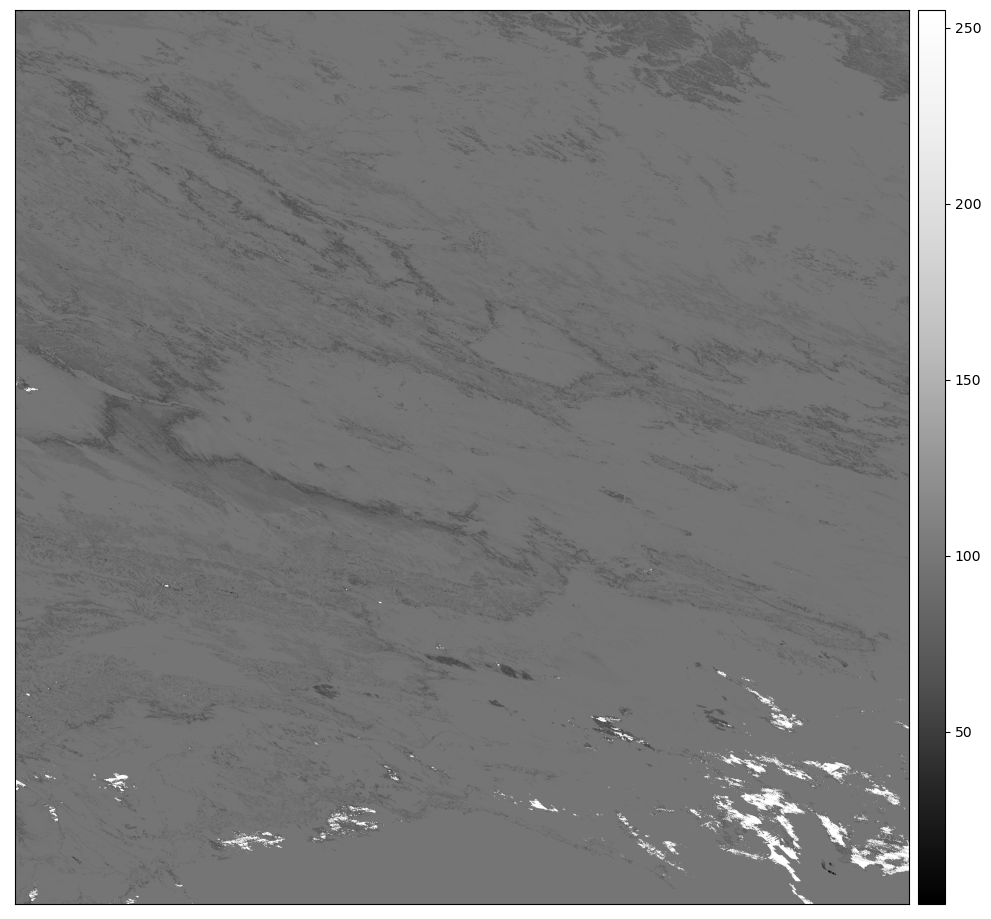

In [104]:
ep.plot_bands(m_2020_h24v04_prop1['LC_Prop1_Assessment'])
plt.show()

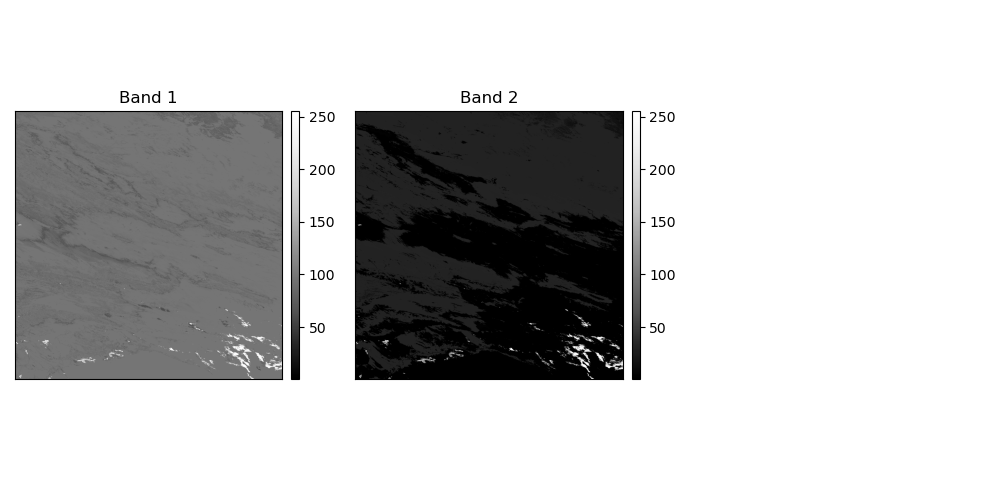

In [107]:
ep.plot_bands(m_2020_h24v04_prop1.to_array().values,figsize=(10,5))
plt.show()

In [126]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

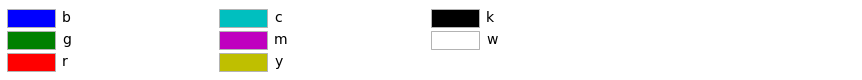

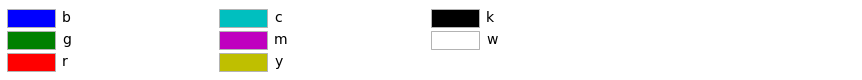

In [127]:
plot_colortable(mcolors.BASE_COLORS, sort_colors=False, emptycols=1)

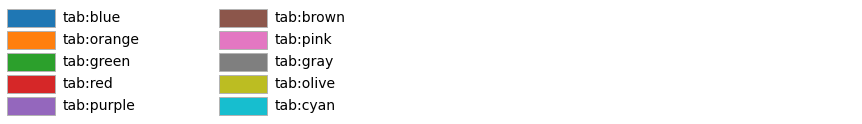

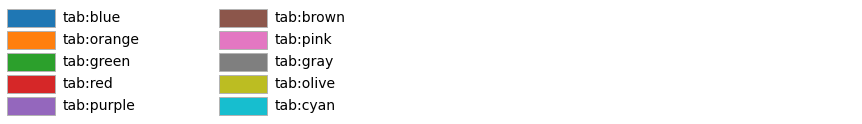

In [128]:
plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)

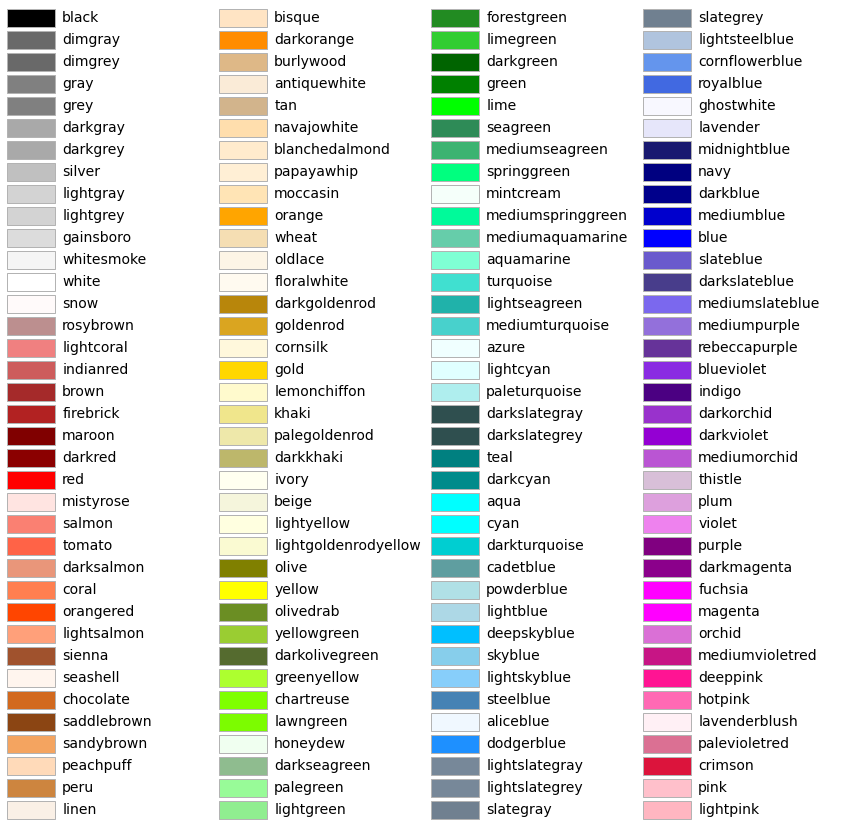

In [129]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [122]:
import numpy as np

np.unique(m_2020_h24v04_prop1.LC_Prop1.values)

array([  1,   2,   3,  11,  13,  14,  15,  16,  21,  22,  31,  32,  42,
        43, 255], dtype=uint8)

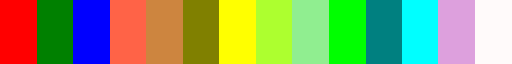

In [194]:
from matplotlib.colors import from_levels_and_colors
from matplotlib import colors

labels={1:"Barren",
        2:"Permanent_Snow_and_Ice",
        3:"Water_Bodies",
        11:"Evergreen_Needleleaf_Forests",
        13:"Deciduous_Needleleaf_Forests",
        14:"Deciduous_Broadleaf_Forests",
        15:"Mixed_Broadleaf_Needleleaf_Forests",
        16:"Mixed_Broadleaf_Forests",
        21:"Open_Forests",
        22:"Sparse_Forests",
        31:"Dense_Herbaceous",
        32:"Sparse_Herbaceous",
        42:"Shrubland_Grassland_Mosaics",
        43:"Sparse_Shrublands",
        255:"Unclassified"}

cmap_lst=[[1,2,3,11,13,14,15,16,21,22,31,32,42,43,255],['red','green','blue','tomato','peru','olive','yellow','greenyellow','lightgreen','lime','teal','cyan','plum','snow']]
cmap_dict={k[0]:colors.to_rgb(k[1]) for k in zip(*cmap_lst)}
cmap, norm=from_levels_and_colors(cmap_lst[0],cmap_lst[1])
cmap

In [212]:
import matplotlib.patches as mpatches
patches=[mpatches.Patch(color=cmap_dict[i],label=labels[i]) for i in cmap_dict]

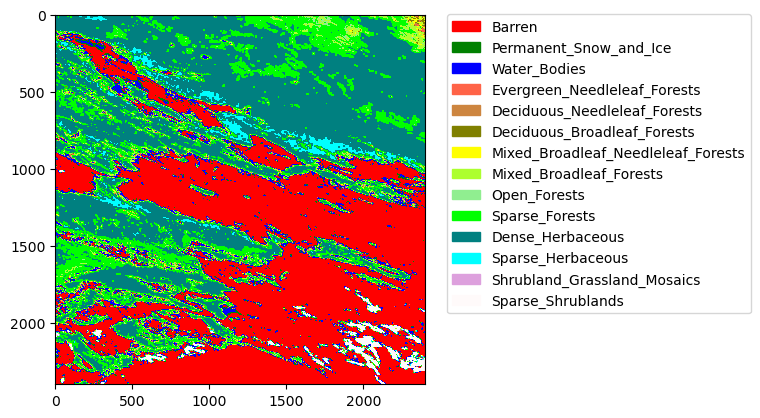

In [213]:
plt.imshow(m_2020_h24v04_prop1.LC_Prop1, cmap=cmap, norm=norm)
plt.legend(handles=patches, bbox_to_anchor=(1.9, 1.02),ncol=1, fancybox=True,)

In [262]:
from rioxarray.merge import merge_arrays

arrays=[rxr.open_rasterio(i,masked=True)['LC_Prop1']for i in MCD12Q1v006_2020_fps[:]]
merged=merge_arrays(arrays)

In [263]:
merged

<xarray.DataArray 'LC_Prop1' (band: 1, y: 9601, x: 16801)>
array([[[21., 21., 21., ..., nan, nan, nan],
        [21., 21., 21., ..., nan, nan, nan],
        [13., 21., 21., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  3.,  3., nan],
        [nan, nan, nan, ...,  3.,  3., nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 5.56e+06 5.56e+06 5.561e+06 ... 1.334e+07 1.334e+07
  * y            (y) float64 6.671e+06 6.671e+06 ... 2.224e+06 2.224e+06
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes: (12/28)
    Barren:                              1
    Deciduous Broadleaf Forests:         14
    Deciduous Needleleaf Forests:        13
    Dense Herbaceous:                    31
    Dense Shrublands:                    41
    Evergreen Broadleaf Forests:         12
    ...                                  ...
    STATISTICS_MINIMUM:                  1
    STATISTICS_STDDEV:                   14.914601178432
    STATISTICS_VALID_PERCENT:            99.67
    scale_factor:                        1.0
    add_offset:                          0.0
    _FillValue:                          nan

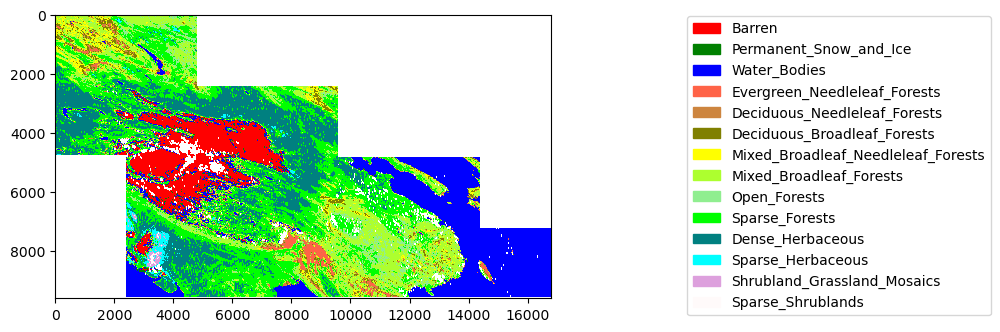

In [266]:
from rioxarray.merge import merge_arrays

arrays=[rxr.open_rasterio(i,masked=True)['LC_Prop1']for i in MCD12Q1v006_2020_fps[:]]
merged=merge_arrays(arrays)

plt.imshow(merged[0], cmap=cmap, norm=norm)
plt.legend(handles=patches, bbox_to_anchor=(1.9, 1.02),ncol=1, fancybox=True,)

In [104]:
all_bands = []
with rio.open(MCD12Q1v006_2020_fps[0]) as dataset:
    # capture meta and CRS data
    hdf4_meta = dataset.meta     
    crs = dataset.read_crs()
    print(crs)
    
    # iterate data layers and select using name
    for layer_name in [name for name in dataset.subdatasets if 'grid500m:Sur_refl_500m' in name]:
        print(layer_name)
        with rio.open(layer_name) as subdataset:
            modis_meta = subdataset.profile
            all_bands.append(subdataset.read(1))

None


In [64]:
print(hdf4_meta)
print(crs)
print(all_bands)

{'driver': 'HDF4', 'dtype': 'float_', 'nodata': None, 'width': 512, 'height': 512, 'count': 0, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
None
[]


In [106]:
from osgeo import gdal
import os

folder='G:\temp'
hdf_file=MCD12Q1v006_2020_fps[0]

# open the dataset
hdf_ds = gdal.Open(hdf_file, gdal.GA_ReadOnly)
subdatasets = hdf_ds.GetSubDatasets()

for i in range(0, len(subdatasets)):
    subdataset_name = subdatasets[i][0]
    #print(subdataset_name)
    band_ds = gdal.Open(subdataset_name, gdal.GA_ReadOnly)
    #print(band_ds)
    band_path = os.path.join(folder, 'band{0}.tif'.format(i))
    if band_ds.RasterCount > 1:
        for j in range(1,band_ds.RasterCount + 1):
            band = band_ds.GetRasterBand(j)
            band_array = band.ReadAsArray()
    else:
        band_array = band_ds.ReadAsArray()
    #print(band_array)
    #print(band_ds.RasterXSize)
    out_ds = gdal.GetDriverByName('GTiff').Create(band_path,
                                                  band_ds.RasterXSize,
                                                  band_ds.RasterYSize,
                                                  1,
                                                  gdal.GDT_Int16,
                                                  ['COMPRESS=LZW', 'TILED=YES'])    
    print(out_ds)
    out_ds.SetGeoTransform(band_ds.GetGeoTransform())
    out_ds.SetProjection(band_ds.GetProjection())
    out_ds.GetRasterBand(1).WriteArray(band_array)
    out_ds.GetRasterBand(1).SetNoDataValue(-32768)
    out_ds=None  #close dataset to write to di
    


None


AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [94]:
MCD12Q1v006_2020_fps[0]

'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h21v03.006.2021360001124.hdf'

#### 1） 

In [60]:
MCD12Q1v006_2020_fps[0]

'G:\\data\\MCD12Q1v006\\data/2020\\MCD12Q1.A2020001.h21v03.006.2021360001124.hdf'

---

注释（Notes）：

①

参考文献（References）:

[1] 